In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data',one_hot=True)
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


Using TensorFlow backend.


In [37]:
X_train,Y_train=mnist.train.images,mnist.train.labels
X_val,Y_val= mnist.validation.images, mnist.validation.labels
X_test,Y_test= mnist.test.images, mnist.test.labels
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_val=X_val.reshape(X_val.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [38]:
h1=32
h2=64
h3=128
h4=256
kernel=3
pool=2
input_shape=(28,28,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_14 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 3, 256)         295168    
__________

In [39]:
network_history=model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=60, 
          batch_size=100, verbose=True)

Train on 55000 samples, validate on 5000 samples
Epoch 1/60
55000/55000 [==============================] - 34s - loss: 0.5286 - acc: 0.8268 - val_loss: 0.1067 - val_acc: 0.9684
Epoch 2/60
55000/55000 [==============================] - 20s - loss: 0.1345 - acc: 0.9593 - val_loss: 0.0785 - val_acc: 0.9790
Epoch 3/60
55000/55000 [==============================] - 20s - loss: 0.0962 - acc: 0.9710 - val_loss: 0.0585 - val_acc: 0.9846
Epoch 4/60
55000/55000 [==============================] - 20s - loss: 0.0782 - acc: 0.9767 - val_loss: 0.0543 - val_acc: 0.9848
Epoch 5/60
55000/55000 [==============================] - 20s - loss: 0.0640 - acc: 0.9803 - val_loss: 0.0494 - val_acc: 0.9864
Epoch 6/60
55000/55000 [==============================] - 20s - loss: 0.0570 - acc: 0.9822 - val_loss: 0.0478 - val_acc: 0.9864
Epoch 7/60
55000/55000 [==============================] - 20s - loss: 0.0499 - acc: 0.9849 - val_loss: 0.0444 - val_acc: 0.9888
Epoch 8/60
55000/55000 [==============================]

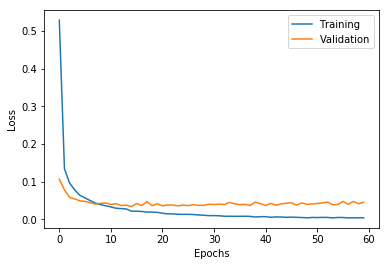

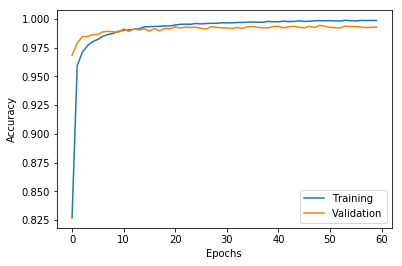

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [41]:
model.save('modelo.h5')
model.save_weights('pesos.h5')